In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set paths to train and validation folders
train_path = "/content/drive/MyDrive/tomato plant health detection model/tomato/train"
valid_path = "/content/drive/MyDrive/tomato plant health detection model/tomato/val"

In [ ]:
# Define image data generators with data augmentation
image_size = (224, 224)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 10 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 1000 images belonging to 10 classes.


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_images(directory, num_images=9, num_columns=3):
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    if len(subfolders) == 0:
        print(f"No subfolders found in {directory}")
        return

    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(directory, random_subfolder)
    image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) < num_images:
        print(f"Number of available images in {subfolder_path} is less than {num_images}")
        return

    random_files = random.sample(image_files, num_images)
    num_rows = (num_images + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 10))

    for i, filename in enumerate(random_files):
        img_path = os.path.join(subfolder_path, filename)
        img = mpimg.imread(img_path)
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)

    plt.tight_layout()
    plt.show()

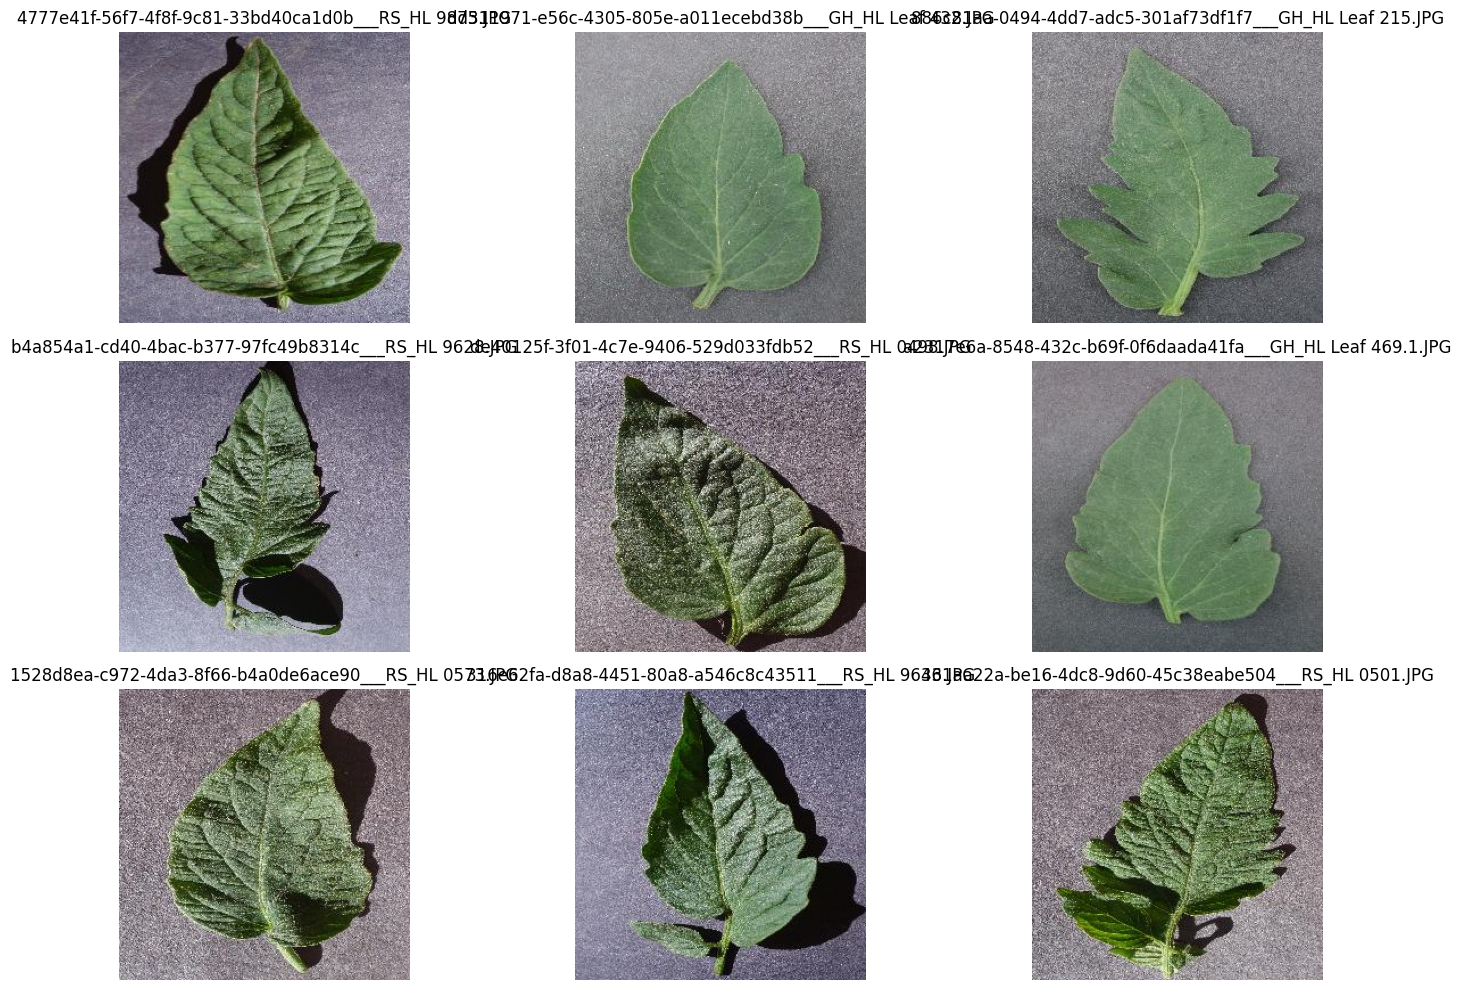

In [ ]:
# Call the function with the desired directory and number of images
display_random_images(train_path, num_images=9, num_columns=3)


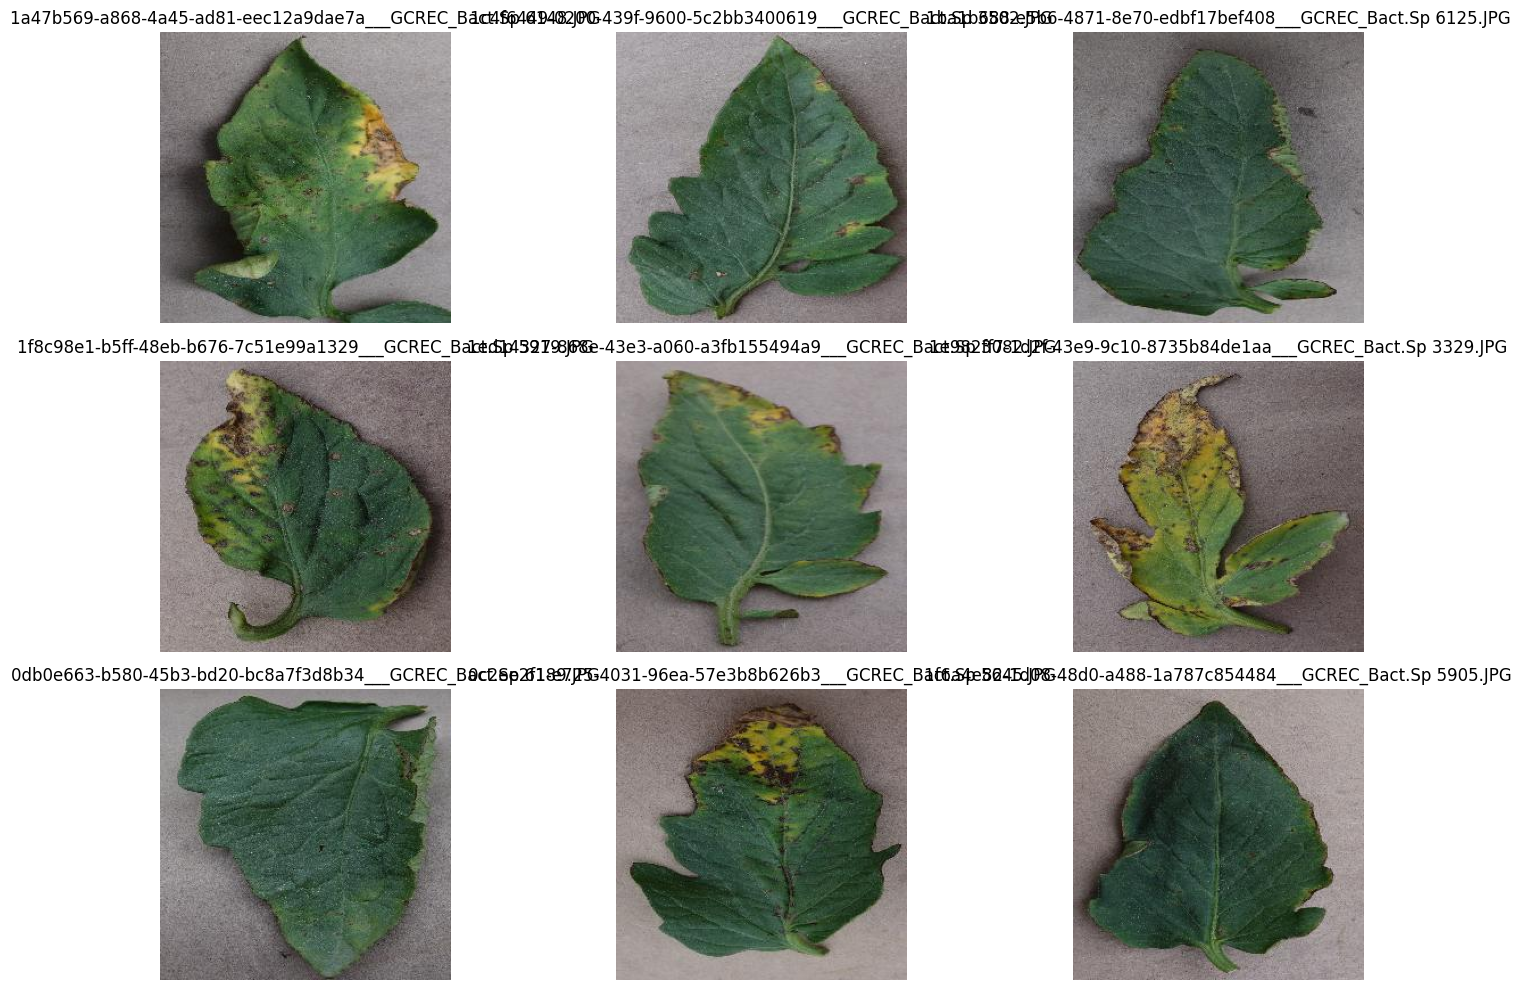

In [ ]:
# Call the function with the desired directory and number of images
display_random_images(valid_path, num_images=9, num_columns=3)

In [ ]:
# Create a CNN model
num_classes = len(train_generator.class_indices)
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(lr=0.0001),  # You can adjust the learning rate as needed
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)

Epoch 1/10
313/313 [==============================] - 1125s 4s/step - loss: 1.0296 - accuracy: 0.6377 - val_loss: 1.1741 - val_accuracy: 0.6130
Epoch 2/10
313/313 [==============================] - 1139s 4s/step - loss: 0.8937 - accuracy: 0.6840 - val_loss: 0.9264 - val_accuracy: 0.6960
Epoch 3/10
313/313 [==============================] - 1139s 4s/step - loss: 0.8101 - accuracy: 0.7140 - val_loss: 0.8522 - val_accuracy: 0.7150
Epoch 4/10
313/313 [==============================] - 1134s 4s/step - loss: 0.7790 - accuracy: 0.7262 - val_loss: 0.9253 - val_accuracy: 0.7370
Epoch 5/10
313/313 [==============================] - 1130s 4s/step - loss: 0.7009 - accuracy: 0.7499 - val_loss: 0.9287 - val_accuracy: 0.7170
Epoch 6/10
313/313 [==============================] - 1128s 4s/step - loss: 0.6797 - accuracy: 0.7645 - val_loss: 0.6195 - val_accuracy: 0.7870
Epoch 7/10
313/313 [==============================] - 1125s 4s/step - loss: 0.6525 - accuracy: 0.7743 - val_loss: 0.4740 - val_accuracy:

UnknownError: ignored

# Visualizing Training Progress

Monitoring the training progress of our machine learning model is crucial for assessing its performance and identifying potential issues like overfitting. In this section, we'll visualize the training and validation accuracy and loss using Matplotlib.

## Training and Validation Accuracy Plot

The following code plots the training and validation accuracy over epochs:


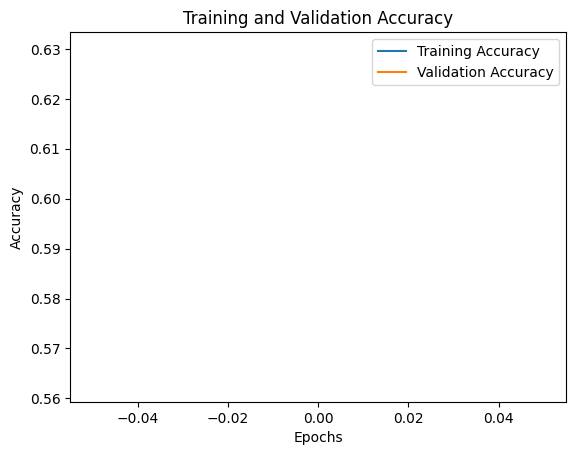

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

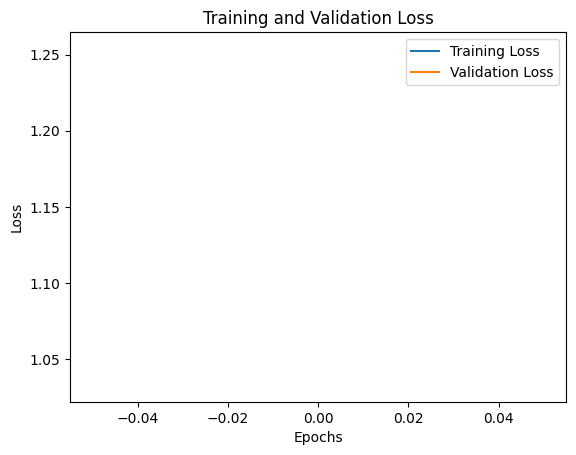

In [ ]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Evaluating the Model on Test Data and Saving

After training our tomato disease detection model, it's essential to assess its performance on unseen data to ensure its real-world utility. Additionally, saving the trained model allows us to deploy it for making predictions on new tomato leaf images.

## Evaluating the Model on Test Data

The following code evaluates the trained model on the test data:



In [ ]:
# Make predictions on test data
test_loss, test_accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the trained model
model.save("trained_model.h5")
print("Trained model saved as 'trained_model.h5'")

32/32 [==============================] - 27s 836ms/step - loss: 1.0332 - accuracy: 0.6300
Test Loss: 1.0332
Test Accuracy: 0.6300
Trained model saved as 'trained_model.h5'


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
# Load the saved model
loaded_model = tf.keras.models.load_model("trained_model.h5")

# Initialize variables
num_samples = len(valid_generator.filenames)
batch_size = 32
num_batches = int(np.ceil(num_samples / batch_size))
all_test_labels = []
all_predicted_labels = []

# Generate predictions in batches
for _ in range(num_batches):
    batch_images, batch_labels = next(valid_generator)
    batch_predictions = loaded_model.predict(batch_images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)

    all_test_labels.extend(np.argmax(batch_labels, axis=1))
    all_predicted_labels.extend(batch_predicted_labels)

# Generate confusion matrix
cm = confusion_matrix(all_test_labels, all_predicted_labels)

# Plot the confusion matrix
class_names = [str(i) for i in range(num_classes)]  # Replace with actual class names if available
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()